# Análise palavras fontes de dados

In [1]:
from explore.informacoes_fontes_dados import obter_informacoes_palavras
from explore.estatistica_palavras_nerds_viajantes import AnaliseEstatisticaPalavras
from explore.grafico_palavras_nerds_viajantes import AnaliseGraficaPalavras
from explore.nuvem_palavras_nerds_viajantes import AnaliseNuvemPalavras

from util import constants

## Análises gráficas de palavras de fontes de dados

## Análise palavras - Nerds Viajantes

In [2]:
informacoes_fonte_de_dados = obter_informacoes_palavras(constants.WIKIPEDIA)

/home/helder/estudos/tcc-pucmg-2/src/python/notebooks/explore/informacoes_fontes_dados.py:40: RuntimeWarning: invalid value encountered in true_divide
  percentual_nao_verbo = 100 * (np.array(tamanhos_sem_verbo) / np.array(tamanhos_documentos))
/home/helder/estudos/tcc-pucmg-2/src/python/notebooks/explore/informacoes_fontes_dados.py:45: RuntimeWarning: invalid value encountered in true_divide
  percentual_nao_verbo_sw = 100 * (np.array(tamanhos_sem_verbo_sw) / np.array(tamanhos_documentos))


In [3]:
informacoes_fonte_de_dados.head(5)

,documento,tamanho,documento_nao_verbo,tamanho_sem_verbo,percentual_nao_verbo,documento_nao_verbo_sw,tamanho_sem_verbo_sw,percentual_nao_verbo_sw
0,"[geograf, argentin, domíni, estud, conhec, sob...",1163,"[geograf, argentin, domíni, tod, caracterís, g...",764,65.692175,"[geograf, argentin, domíni, tod, caracterís, g...",764,65.692175
1,"[banc, namuncur, banc, burdwood, plataform, su...",37,"[namuncur, burdwood, plataform, subaquá, 150, ...",22,59.459459,"[namuncur, burdwood, plataform, subaquá, 150, ...",22,59.459459
2,"[camp, gel, sul, patagón, castelh, hiel, conti...",181,"[sul, patagón, castelh, hiel, continent, hiel,...",116,64.088398,"[sul, patagón, castelh, hiel, continent, hiel,...",116,64.088398
3,"[pic, glór, morr, cerr, próx, cidad, argentin,...",203,"[glór, próx, cidad, argentin, mendoz, quas, ch...",113,55.665025,"[glór, próx, cidad, argentin, mendoz, quas, ch...",113,55.665025
4,"[chac, austr, trê, princip, divis, chac, porç,...",62,"[chac, austr, trê, princip, chac, porç, merid,...",41,66.129032,"[chac, austr, trê, princip, chac, porç, merid,...",41,66.129032


## Análise fonte de dados selecionada

In [4]:
analise_grafica = AnaliseGraficaPalavras(informacoes_fonte_de_dados)

### Distribuição de percentuais de tokens não verbo no documento

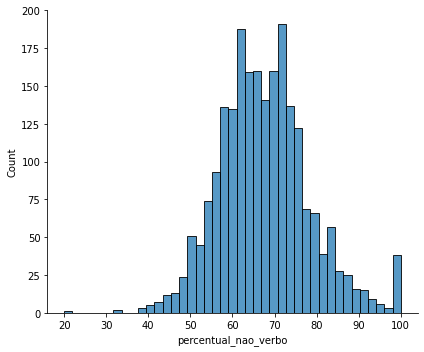

In [5]:
analise_grafica.analisar_distribuicao_percentual('percentual_nao_verbo')

### Distribuição de percentuais de tokens não verbo nem stopwords no documento

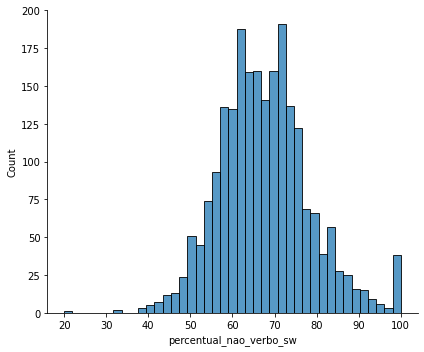

In [6]:
analise_grafica.analisar_distribuicao_percentual('percentual_nao_verbo_sw')

### Distribuição de tamanho de documento

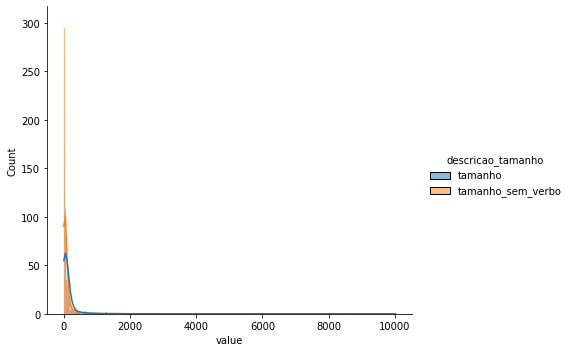

In [7]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo')

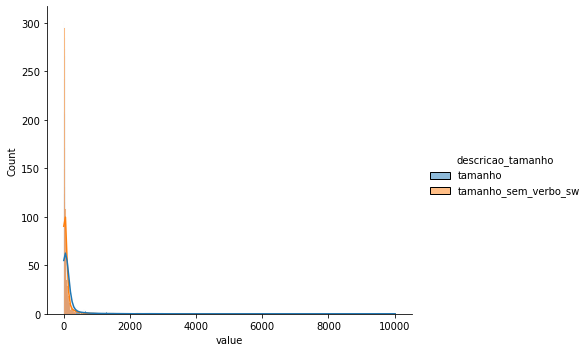

In [8]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo_sw')

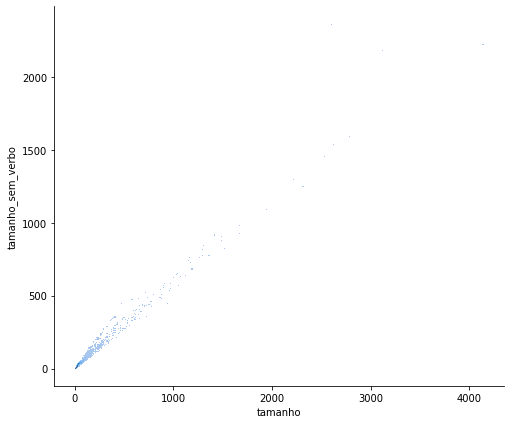

In [10]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo', bidimensional=True)

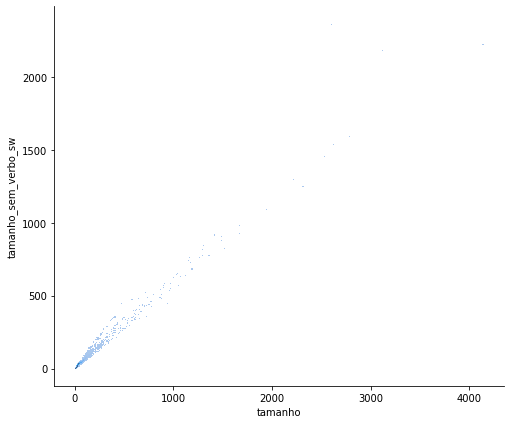

In [11]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo_sw', bidimensional=True)

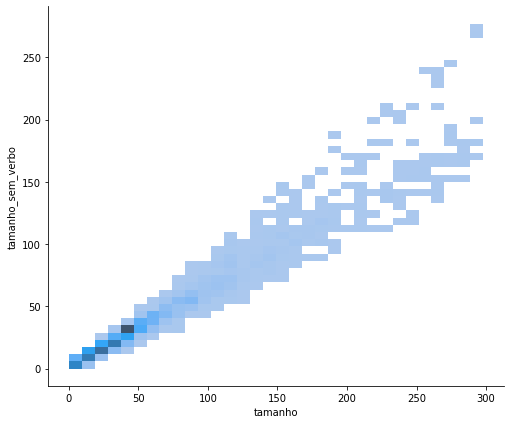

In [12]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo', bidimensional=True, x_max=300)

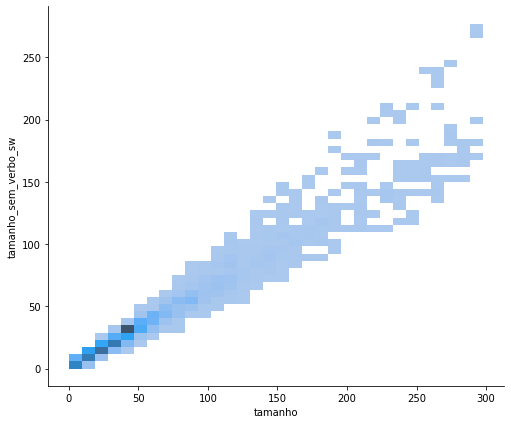

In [13]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo_sw', bidimensional=True, x_max=300)

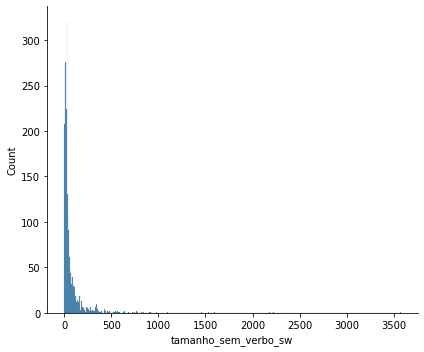

In [14]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo_sw')

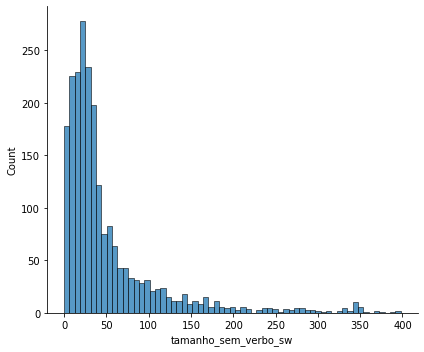

In [15]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo_sw', x_max=400)

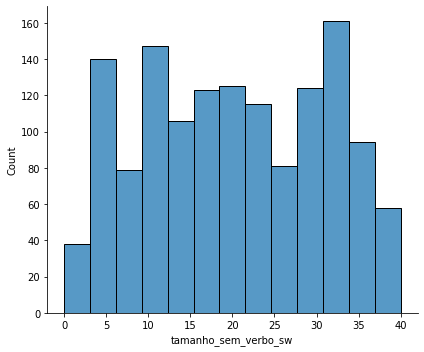

In [16]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo_sw', x_max=40)

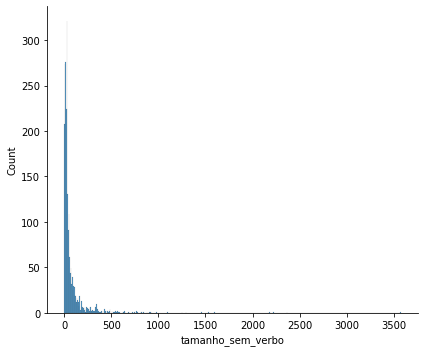

In [17]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo')

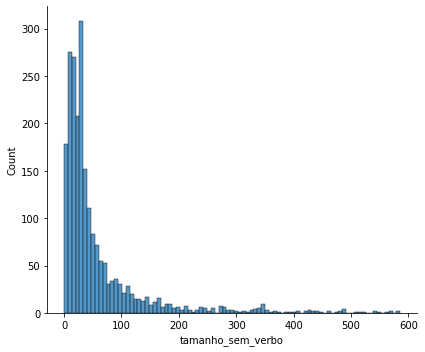

In [18]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo', x_max=600)

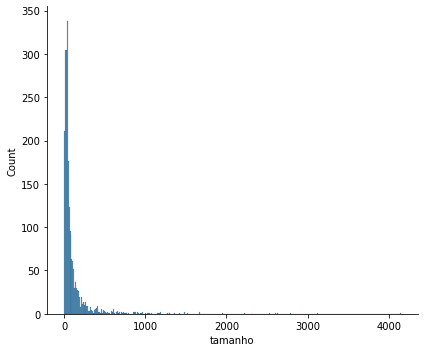

In [19]:
analise_grafica.analisar_distribuicao_tamanhos()

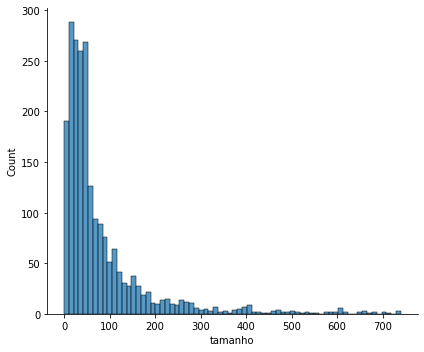

In [20]:
analise_grafica.analisar_distribuicao_tamanhos(x_max=750)

## Análise estatística da fonte selecionada

In [21]:
analise_estatistica = AnaliseEstatisticaPalavras(informacoes_fonte_de_dados)

### Contagem geral de tokens

In [22]:
analise_estatistica.exibir_total_tokens('documento')

O total de tokens de todos os documentos para a coluna "documento" eh 280142


In [23]:
analise_estatistica.exibir_total_tokens('documento_nao_verbo')

O total de tokens de todos os documentos para a coluna "documento_nao_verbo" eh 178017


In [24]:
analise_estatistica.exibir_total_tokens('documento_nao_verbo_sw')

O total de tokens de todos os documentos para a coluna "documento_nao_verbo_sw" eh 178017


### Exibição de tokens mais frequentes

#### 10 tokens mais frequentes

In [25]:
print('10 Tokens mais comuns entre todos os tokens:')
analise_estatistica.exibir_tokens_mais_comuns('documento')

print('10 Tokens mais comuns eliminando os verbos:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo')

print('10 Tokens mais comuns eliminando os verbos e as stopwords customizadas:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo_sw')

10 Tokens mais comuns entre todos os tokens:
[('est', 2588), ('local', 1961), ('part', 1548), ('argentin', 1459), ('reg', 1435), ('rio', 1347), ('cidad', 1342), ('áre', 1313), ('km²', 1265), ('popul', 1238)]
10 Tokens mais comuns eliminando os verbos:
[('argentin', 1459), ('rio', 1347), ('cidad', 1342), ('áre', 1313), ('km²', 1265), ('popul', 1238), ('provínc', 1149), ('nacion', 1138), ('americ', 1107), ('sul', 1102)]
10 Tokens mais comuns eliminando os verbos e as stopwords customizadas:
[('argentin', 1459), ('rio', 1347), ('cidad', 1342), ('áre', 1313), ('km²', 1265), ('popul', 1238), ('provínc', 1149), ('nacion', 1138), ('americ', 1107), ('sul', 1102)]


#### 20 tokens mais frequentes

In [26]:
print('20 Tokens mais comuns entre todos os tokens:')
analise_estatistica.exibir_tokens_mais_comuns('documento', n=20)

print('20 Tokens mais comuns eliminando os verbos:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo', n=20)

print('20 Tokens mais comuns eliminando os verbos e as stopwords customizadas:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo_sw', n=20)

20 Tokens mais comuns entre todos os tokens:
[('est', 2588), ('local', 1961), ('part', 1548), ('argentin', 1459), ('reg', 1435), ('rio', 1347), ('cidad', 1342), ('áre', 1313), ('km²', 1265), ('popul', 1238), ('ilh', 1225), ('nort', 1156), ('provínc', 1149), ('nacion', 1138), ('nov', 1137), ('americ', 1107), ('sul', 1102), ('parqu', 1091), ('govern', 1079), ('grand', 1071)]
20 Tokens mais comuns eliminando os verbos:
[('argentin', 1459), ('rio', 1347), ('cidad', 1342), ('áre', 1313), ('km²', 1265), ('popul', 1238), ('provínc', 1149), ('nacion', 1138), ('americ', 1107), ('sul', 1102), ('parqu', 1091), ('grand', 1071), ('ano', 1034), ('unid', 1000), ('chil', 855), ('outr', 790), ('águ', 685), ('cens', 682), ('país', 652), ('cobert', 606)]
20 Tokens mais comuns eliminando os verbos e as stopwords customizadas:
[('argentin', 1459), ('rio', 1347), ('cidad', 1342), ('áre', 1313), ('km²', 1265), ('popul', 1238), ('provínc', 1149), ('nacion', 1138), ('americ', 1107), ('sul', 1102), ('parqu', 10

### Descrição estatística dos tamanhos dos documentos

In [27]:
analise_estatistica.analisar_tamanhos_documentos()

            tamanho  tamanho_sem_verbo  tamanho_sem_verbo_sw
count   2252.000000        2252.000000           2252.000000
mean     124.396980          79.048401             79.048401
std      411.484728         239.066742            239.066742
min        0.000000           0.000000              0.000000
5%         7.000000           5.000000              5.000000
10%       12.000000           8.000000              8.000000
25%       24.000000          17.000000             17.000000
50%       45.000000          31.000000             31.000000
75%      100.000000          64.000000             64.000000
90%      228.000000         149.900000            149.900000
95%      405.450000         278.450000            278.450000
max    10018.000000        5699.000000           5699.000000


## Nuvem de palavras

In [28]:
analise_nuvem_palavras = AnaliseNuvemPalavras(informacoes_fonte_de_dados)

## Nuvem de palavras da fonte selecionada

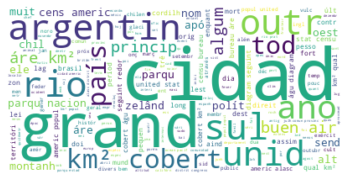

In [29]:
analise_nuvem_palavras.gerar_nuvem_palavras('documento_nao_verbo_sw')

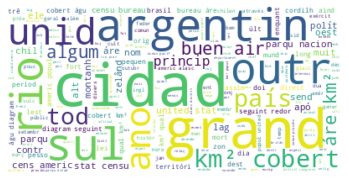

In [30]:
analise_nuvem_palavras.gerar_nuvem_palavras('documento_nao_verbo')

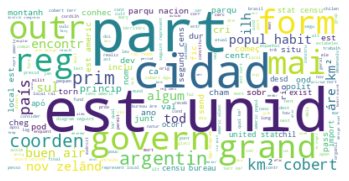

In [31]:
analise_nuvem_palavras.gerar_nuvem_palavras('documento')

## Análise de 100 palavras que mais aparecem

In [32]:
documentos = informacoes_fonte_de_dados['documento'].values

In [33]:
documentos[:5]

array([list(['geograf', 'argentin', 'domíni', 'estud', 'conhec', 'sobr', 'tod', 'caracterís', 'geográf', 'territóri', 'argentin', 'argentin', 'pod', 'ser', 'divid', 'esquematic', 'quatr', 'part', 'planíci', 'fértel', 'pamp', 'metad', 'nort', 'país', 'centr', 'riqu', 'agrícol', 'argentin', 'planalt', 'patagón', 'metad', 'sul', 'terr', 'fog', 'vez', 'plan', 'vez', 'ondul', 'escarp', 'cordilh', 'and', 'long', 'fronteir', 'ocident', 'chil', 'cuj', 'pont', 'elev', 'mont', 'aconcágu', '6960', 'altitud', 'planíci', 'chac', 'compartilh', 'bolív', 'paragu', 'brasil', 'rio', 'princip', 'paragu', 'bermej', 'color', 'urugu', 'mai', 'tod', 'paran', 'doi', 'últ', 'junt', 'ant', 'desagu', 'ocean', 'atlân', 'form', 'estu', 'rio', 'prat', 'clim', 'argentin', 'geral', 'temper', 'extr', 'subtropic', 'nort', 'árid', 'sub', 'antár', 'extr', 'sul', 'territóri', 'argentin', 'estend', 'longitud', 'cordilh', 'and', 'ocean', 'atlân', 'caracteriz', 'variedad', 'pais', 'físic', 'result', 'trans', 'zon', 'plan', '